# **Agent Trained using Random Walk**

In [1]:
pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.8 MB/s eta 0:00:00


In [2]:
pip install pygame

In [3]:
import gymnasium as gym

In [4]:
env = gym.make("Taxi-v3",render_mode="human")

state_space = env.observation_space.n

print("There are ",state_space,"possible states")

action_space = env.action_space.n

print("There are ", action_space, "possible actions")

env.reset()
env.s = 123

env.render()

There are  500 possible states
There are  6 possible actions


In [5]:
class RandomAgent:
    def __init__(self,env):
        self.env=env
    def get_action(self,state) -> int:
        return self.env.action_space.sample()


In [6]:
agent = RandomAgent(env)

env.reset()
state = 123
env.s = state
epochs = 0
penalties = 0
reward = 0
frames_agent = []

done = False


In [7]:
while not done:

    if done==False:


        action = agent.get_action(state)


        step_info = env.step(action)
        next_state = step_info[0]
        reward = step_info[1]
        done = step_info[2]
        info = step_info[3]

        if reward == -10:
            penalties += 1


        frames_agent.append({
            'frame': env.render(),
            'state': next_state,
            'action': action,
            'reward': reward
        })


        epochs+=1


    state = next_state

print("Timesteps taken (Agent ): {}".format(epochs))
print("Penalties incurred (Agent): {}".format(penalties))
print("Rewards collected (Agent): {}".format(reward))




Timesteps taken (Agent ): 1672
Penalties incurred (Agent): 558
Rewards collected (Agent): 20


# **Agent Trained using Q-learning**

In [8]:
import gym
env = gym.make("Taxi-v3").env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [9]:
import numpy as np

class QAgent:

    def __init__(self, env, alpha, gamma):
        self.env = env


        self.q_table = np.zeros([env.observation_space.n,
                                 env.action_space.n])


        self.alpha = alpha
        self.gamma = gamma

    def get_action(self, state):
        """"""
        return np.argmax(self.q_table[state])

    def update_parameters(self, state, action, reward, next_state):
        """"""

        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = \
            old_value + \
            self.alpha * (reward + self.gamma * next_max - old_value)


        self.q_table[state, action] = new_value

In [10]:
alpha = 0.1
gamma = 0.6

agent = QAgent(env, alpha, gamma)

In [11]:
import random
from tqdm import tqdm


epsilon = 0.1

n_episodes = 10000


timesteps_per_episode = []
penalties_per_episode = []


for i in tqdm(range(0, n_episodes)):

    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:

        if random.uniform(0, 1) < epsilon:

            action = env.action_space.sample()
        else:

            action = agent.get_action(state)

        next_state, reward, done, info = env.step(action)

        agent.update_parameters(state, action, reward, next_state)

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    timesteps_per_episode.append(epochs)
    penalties_per_episode.append(penalties)

100%|██████████| 10000/10000 [00:11<00:00, 843.04it/s]


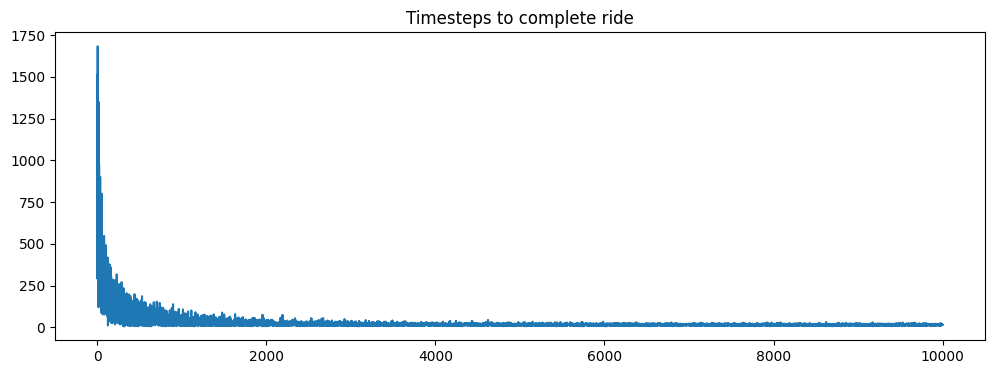

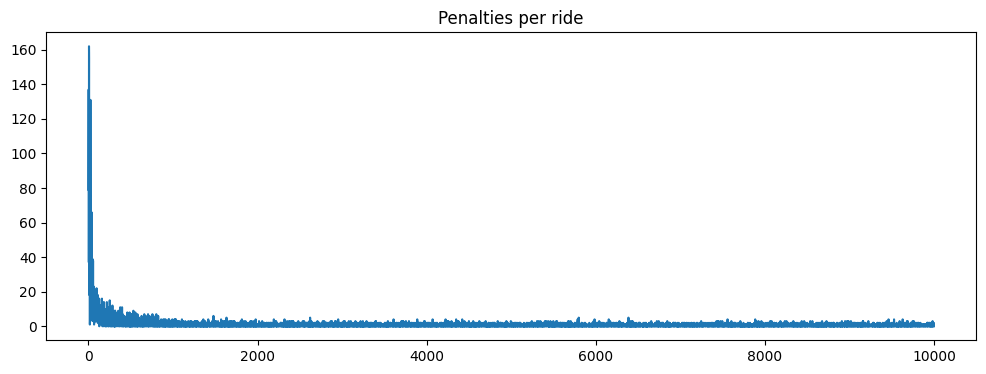

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")
pd.Series(timesteps_per_episode).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")
pd.Series(penalties_per_episode).plot(kind='line')
plt.show()

In [13]:
import random
from tqdm import tqdm


epsilon = 0.05

n_episodes = 1


timesteps_per_episode = []
penalties_per_episode = []


for i in tqdm(range(0, n_episodes)):

    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:

        if random.uniform(0, 1) < epsilon:

            action = env.action_space.sample()
        else:

            action = agent.get_action(state)

        next_state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    timesteps_per_episode.append(epochs)
    penalties_per_episode.append(penalties)

100%|██████████| 1/1 [00:00<00:00, 554.80it/s]


In [14]:
print(f'Avg steps to complete ride: {np.array(timesteps_per_episode).mean()}')
print(f'Avg penalties to complete ride: {np.array(penalties_per_episode).mean()}')

Avg steps to complete ride: 23.0
Avg penalties to complete ride: 1.0
